In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw = pd.read_csv('melb_data.csv')
df = raw.copy()

# Data Exploration

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
rows, cols = df.shape
print(f'This dataset contains {rows} rows and {cols} columns of data')

This dataset contains 13580 rows and 21 columns of data


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Data Handling

### Missing Values

In [6]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [7]:
def show_missing_rows(df, column_name, max_rows):
    missing_rows = df[df[column_name].isna()]
    return missing_rows.head(max_rows)

#### Col 'Car'

In [8]:
show_missing_rows(df, 'Car', len(df))

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12221,Ascot Vale,132 The Parade,3,h,985000.0,S,Brad,3/09/2017,4.3,3032.0,...,1.0,NaN,245.0,91.0,1945.0,NaN,-37.77215,144.91144,Western Metropolitan,6567.0
12247,Brunswick East,18 Ethel St,2,h,1023000.0,S,Domain,3/09/2017,4.0,3057.0,...,1.0,NaN,154.0,76.0,1890.0,NaN,-37.77221,144.97537,Northern Metropolitan,5533.0
12259,Clifton Hill,34 Fenwick St,3,h,1436000.0,S,Jellis,3/09/2017,3.6,3068.0,...,2.0,NaN,123.0,128.0,1990.0,NaN,-37.78888,145.00036,Northern Metropolitan,2954.0
12320,Glen Waverley,19 Diamond Av,3,h,1370000.0,S,Fletchers,3/09/2017,16.7,3150.0,...,1.0,NaN,652.0,NaN,NaN,NaN,-37.87170,145.17267,Eastern Metropolitan,15321.0
12362,Newport,11 Collingwood Rd,4,h,1180000.0,PI,Williams,3/09/2017,6.2,3015.0,...,1.0,NaN,545.0,NaN,NaN,NaN,-37.84399,144.89125,Western Metropolitan,5498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,Moonee Ponds,46 Eglinton St,4,h,1525000.0,S,Nelson,26/08/2017,6.2,3039.0,...,3.0,NaN,233.0,NaN,NaN,NaN,-37.76884,144.91708,Western Metropolitan,6232.0
13508,North Melbourne,9 Erskine St,2,h,1080000.0,S,Jellis,26/08/2017,1.8,3051.0,...,1.0,NaN,100.0,67.0,1890.0,NaN,-37.79524,144.94642,Northern Metropolitan,6821.0
13522,Port Melbourne,201 Stokes St,2,h,1515000.0,SP,Marshall,26/08/2017,3.5,3207.0,...,2.0,NaN,197.0,NaN,NaN,NaN,-37.83754,144.93954,Southern Metropolitan,8648.0
13524,Prahran,17 Packington Pl,2,h,1365000.0,S,Jellis,26/08/2017,4.6,3181.0,...,1.0,NaN,206.0,100.0,1900.0,NaN,-37.85569,145.00522,Southern Metropolitan,7717.0


As we could see from above, Car with 'NaN' value would be expected to be 0 but input as 'NaN'. Hence, we will just replace null value as 0.0.

In [9]:
df['Car'] = df['Car'].fillna(0)
show_missing_rows(df, 'Car', len(df))

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


#### Col 'CouncilArea'

In [10]:
show_missing_rows(df, 'CouncilArea', 10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7584,Brighton East,7 Roberts Ct,3,h,1270000.0,VB,Ray,20/05/2017,10.7,3187.0,...,1.0,3.0,724.0,NaN,NaN,NaN,-37.92910,145.02970,Southern Metropolitan,6938.0
10797,Reservoir,48 Crevelli St,3,h,526250.0,SP,Barry,8/07/2017,12.0,3073.0,...,1.0,1.0,308.0,NaN,NaN,NaN,-37.72828,145.03033,Northern Metropolitan,21650.0
12213,Aberfeldie,1 Alma St,4,h,1436000.0,S,Brad,3/09/2017,7.5,3040.0,...,3.0,3.0,511.0,187.0,1922.0,NaN,-37.75788,144.90487,Western Metropolitan,1543.0
12214,Albion,40 Ridley St,5,h,905000.0,S,hockingstuart,3/09/2017,10.5,3020.0,...,2.0,3.0,732.0,NaN,1925.0,NaN,-37.78345,144.82295,Western Metropolitan,2185.0
12215,Alphington,22 Harker St,4,h,1680000.0,S,Love,3/09/2017,5.7,3078.0,...,3.0,2.0,720.0,NaN,NaN,NaN,-37.77928,145.02993,Northern Metropolitan,2211.0
12216,Altona,86 Grieve Pde,3,h,913000.0,S,Greg,3/09/2017,11.0,3018.0,...,2.0,3.0,530.0,148.0,1985.0,NaN,-37.86140,144.81931,Western Metropolitan,5301.0
12217,Altona Meadows,96 Linden St,3,h,590000.0,PI,hockingstuart,3/09/2017,15.5,3028.0,...,1.0,2.0,459.0,NaN,NaN,NaN,-37.87063,144.77632,Western Metropolitan,7630.0
12218,Altona North,95 Marion St,3,h,1070000.0,PI,RT,3/09/2017,9.4,3025.0,...,1.0,3.0,693.0,134.0,1950.0,NaN,-37.83511,144.84905,Western Metropolitan,5132.0
12219,Armadale,121 Kooyong Rd,4,h,5100000.0,S,Marshall,3/09/2017,6.3,3143.0,...,2.0,2.0,761.0,255.0,1900.0,NaN,-37.85249,145.02091,Southern Metropolitan,4836.0
12220,Armadale,2/26 Mercer Rd,2,u,820000.0,S,Jellis,3/09/2017,6.3,3143.0,...,1.0,1.0,1501.0,NaN,NaN,NaN,-37.85280,145.02684,Southern Metropolitan,4836.0


We have observe that some Suburb with missing CouncilArea is just an input mistake. Hence, we could create a mapping table for linking <br>
**Suburb -> CouncilArea**<br>
Note that 1 suburb can only belong to 1 Council, while a CouncilArea could obtain 1 or n suburb. Hence, we will check whether the original dataset has any logic failure in step 1.

In [11]:
# Step 1: Create mapping df for Suburb -> CouncilArea
mapping_df = df[['Suburb', 'CouncilArea']].dropna().drop_duplicates(subset=['Suburb'])
suburb_council_counts = mapping_df.groupby('Suburb')['CouncilArea'].nunique()
suburbs_multiple_councils = suburb_council_counts[suburb_council_counts > 1]
print('Below are the Suburbs linked to multiple CouncilArea:\n' + str(suburbs_multiple_councils) if not suburbs_multiple_councils.empty
      else 'No Suburbs linked to multiple CouncilArea found.')

No Suburbs linked to multiple CouncilArea found.


In [12]:
# Step 2: Define a func to fill rows with missing CouncilArea
def fill_council_area(row):
    if pd.isna(row['CouncilArea']):
        suburb = row['Suburb']
        # Lookup CouncilArea from mapping
        matched = mapping_df[mapping_df['Suburb'] == suburb]['CouncilArea']
        if not matched.empty:
            return matched.values[0]
    return row['CouncilArea']

# Step 3: Apply function row-wise to fill missing CouncilArea values
df['CouncilArea'] = df.apply(fill_council_area, axis=1)

In [13]:
show_missing_rows(df, 'CouncilArea', 10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12251,Burnside,22 Paringa Wy,3,h,657500.0,SP,Harcourts,3/09/2017,14.8,3023.0,...,2.0,2.0,631.0,NaN,NaN,NaN,-37.75225,144.75520,Western Metropolitan,1607.0
12438,Attwood,2 Herod Pl,3,h,640000.0,SP,YPA,9/09/2017,16.5,3049.0,...,2.0,2.0,607.0,NaN,NaN,NaN,-37.67379,144.89826,Northern Metropolitan,1130.0
12865,Wallan,14 Danaher Av,3,h,366000.0,S,Ray,16/09/2017,44.2,3756.0,...,1.0,1.0,502.0,77.0,1978.0,NaN,-37.40853,144.97749,Northern Victoria,3988.0
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,...,3.0,5.0,44500.0,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0
13264,Plumpton,9 Remy Av,4,h,625500.0,SP,HAR,23/09/2017,23.8,3335.0,...,2.0,2.0,477.0,178.0,2012.0,NaN,-37.71429,144.72492,Western Metropolitan,1490.0
13381,Burnside,18 Fydler Av,3,h,580000.0,S,YPA,26/08/2017,14.8,3023.0,...,2.0,2.0,461.0,174.0,2000.0,NaN,-37.74518,144.74708,Western Metropolitan,1607.0
13494,Monbulk,21 David St,4,h,720000.0,SP,Fletchers,26/08/2017,34.1,3793.0,...,2.0,2.0,1611.0,NaN,NaN,NaN,-37.87931,145.41288,Eastern Victoria,1424.0


Now the missing rows has been reduced to 7. We could just manually input the CouncilArea for these rows.

In [14]:
# Manual updates for specific suburbs with multiple council areas
manual_updates = {
    'Burnside': 'Melton',
    'Attwood': 'Hume',
    'Wallan': 'Mitchell',
    'New Gisborne': 'Macedon Ranges',
    'Plumpton': 'Melton',
    'Monbulk': 'Yarra Ranges'
}

# Apply updates row-wise
def update_council_area(row):
    if row['Suburb'] in manual_updates:
        return manual_updates[row['Suburb']]
    else:
        return row['CouncilArea']

df['CouncilArea'] = df.apply(update_council_area, axis=1)


In [15]:
show_missing_rows(df, 'CouncilArea', 10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


#### Col 'BuildingArea'

In [16]:
BuildingArea_missing = df['BuildingArea'].isnull().sum()/len(df)
print(f'We have {BuildingArea_missing*100:.2f}% missing values in BuildingArea')

We have 47.50% missing values in BuildingArea


From above, missing building area is representing almost half of the rows. Hence, we cannot simply drop these rows.<br>
For handling methods, Iterative Imputer [1] is our data handling method.<br>
[1] https://www.geeksforgeeks.org/machine-learning/handling-missing-data-with-iterativeimputer-in-scikit-learn/

In [17]:
# Correlation matrix for numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns 
corr_matrix = df[numeric_cols].corr()
print(corr_matrix['BuildingArea'].sort_values(ascending=False))


BuildingArea     1.000000
Landsize         0.500485
Rooms            0.124127
Bedroom2         0.122319
Bathroom         0.111933
Distance         0.099481
Car              0.096041
Price            0.090981
Postcode         0.055475
Lattitude        0.043420
YearBuilt        0.019665
Longtitude      -0.023810
Propertycount   -0.028840
Name: BuildingArea, dtype: float64


We would select the relevant cols 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom', 'Bathroom', 'Car', 'Price'

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

features = ['BuildingArea', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom', 'Bathroom', 'Car', 'Price']
imp_df = df[features]

imp = IterativeImputer(random_state=42, min_value=0)
imp_array = imp.fit_transform(imp_df)
df[features] = imp_array
df['BuildingArea'].isnull().sum()

np.int64(0)

In [19]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.602725,558.416127,169.431613,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.966548,3990.669241,1084.145834,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,85.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,133.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,189.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,111685.724901,2018.000000,-37.408530,145.526350,21650.000000


In [20]:
old_rows = df.shape[0]
df = df[df['BuildingArea'] != 0]
new_rows = df.shape[0]
print(f'Removed {old_rows - new_rows} rows from BuildingArea where BuildingArea = 0, which is impossible.')

Removed 398 rows from BuildingArea where BuildingArea = 0, which is impossible.


#### Col 'YearBuilt'

For this col, YearBuilt is intrinsically hard to be predicted with the given columns. Hence, we will simply use the mode to fillna.

In [21]:
most_freq = df['YearBuilt'].mode()[0]
print(f'The most frequent year built is {most_freq}')

The most frequent year built is 1970.0


In [22]:
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mode()[0]) # 0 means the first mode
df['YearBuilt'].isnull().sum()

np.int64(0)

In [23]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,95.882099,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.000000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.000000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,39.272105,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.000000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [24]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

### Format Unifying

In [25]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

### Duplicate Detection

In [26]:
print(f'There are {df.duplicated().sum()} duplicate rows.')


There are 0 duplicate rows.


### Outlier Detection

In [27]:
old_rows = df.shape[0]
df = df[df['Landsize'] != 0]
new_rows = df.shape[0]
print(f'Removed {old_rows - new_rows} rows from Landsize where Landsize = 0, which is impossible.')

Removed 1565 rows from Landsize where Landsize = 0, which is impossible.


In [28]:
df.describe()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,11617.000000,1.161700e+04,11617,11617.000000,11617.000000,11617.000000,11617.000000,11617.000000,11617.000000,11617.000000,11617.000000,11617.000000,11617.000000,11617.000000
mean,3.099682,1.147619e+06,2017-02-08 14:43:18.743220992,10.762546,3104.775501,3.072652,1.584058,1.682706,652.000000,189.679862,1965.299045,-37.806618,144.996457,7322.926659
min,1.000000,1.310000e+05,2016-01-28 00:00:00,0.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,0.381720,1196.000000,-38.182550,144.431810,249.000000
25%,3.000000,7.150000e+05,2016-09-17 00:00:00,6.900000,3044.000000,3.000000,1.000000,1.000000,270.000000,103.397809,1960.000000,-37.856720,144.924200,4019.000000
50%,3.000000,9.750000e+05,2017-03-18 00:00:00,10.200000,3083.000000,3.000000,1.000000,2.000000,533.000000,146.848646,1970.000000,-37.796330,145.003300,6482.000000
75%,4.000000,1.400000e+06,2017-07-01 00:00:00,13.500000,3147.000000,4.000000,2.000000,2.000000,676.000000,199.381954,1970.000000,-37.750170,145.066700,9758.000000
max,10.000000,9.000000e+06,2017-09-23 00:00:00,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,111685.724901,2018.000000,-37.408530,145.526350,21650.000000
std,0.893646,6.469934e+05,NaN,5.944759,94.497938,0.910164,0.707239,0.997520,4307.621328,1170.659989,29.752499,0.082773,0.109993,4402.457045


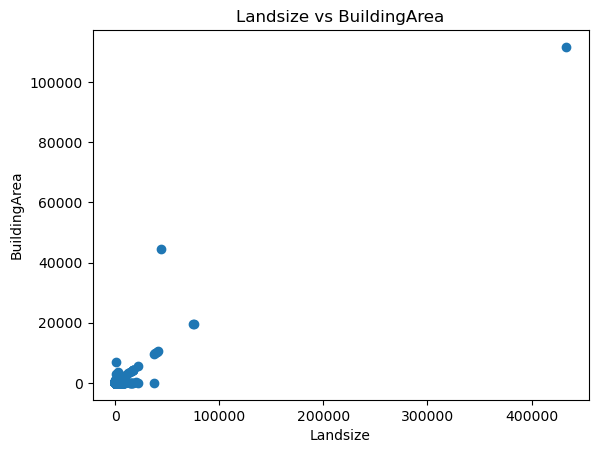

In [29]:
# Scatter plot to visualise Landsize vs BuildingArea
plt.scatter(df['Landsize'], df['BuildingArea'])

# Adding labels and title
plt.xlabel('Landsize')
plt.ylabel('BuildingArea')
plt.title('Landsize vs BuildingArea')
plt.show()

Apparently there are outliers foor Landsize and BuildingArea. Hence, we would adopt the Interquantile Range (IQR) Method [1].<br>
[1] https://www.geeksforgeeks.org/data-science/detect-and-remove-the-outliers-using-python/

In [30]:
Q1 = df['Landsize'].quantile(0.25)
Q3 = df['Landsize'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
print(f'IQR: {IQR}, Lower bound: {lower}, Upper bound: {upper}')

IQR: 406.0, Lower bound: -339.0, Upper bound: 1285.0


In [31]:
old_rows = df.shape[0]
df = df[(df['Landsize'] >= lower) & (df['Landsize'] <= upper)]
new_rows = df.shape[0]
print(f'Removed {old_rows - new_rows} outliers from Landsize.')

Removed 394 outliers from Landsize.


In [32]:
Q1 = df['BuildingArea'].quantile(0.25)
Q3 = df['BuildingArea'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
print(f'IQR: {IQR}, Lower bound: {lower}, Upper bound: {upper}')

IQR: 92.17985737919564, Lower bound: -34.44964344798909, Upper bound: 334.26978606879345


In [33]:
old_rows = df.shape[0]
df = df[(df['BuildingArea'] >= lower) & (df['BuildingArea'] <= upper)]
new_rows = df.shape[0]
print(f'Removed {old_rows - new_rows} outliers from BuildingArea.')

Removed 282 outliers from BuildingArea.


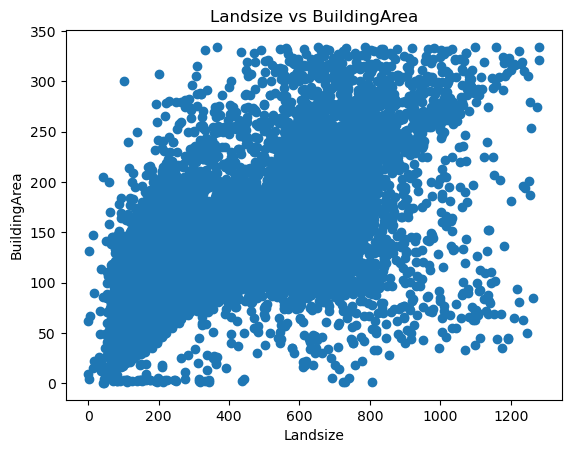

In [34]:
# Scatter plot to visualise Landsize vs BuildingArea
plt.scatter(df['Landsize'], df['BuildingArea'])

# Adding labels and title
plt.xlabel('Landsize')
plt.ylabel('BuildingArea')
plt.title('Landsize vs BuildingArea')
plt.show()

In [35]:
# YearBuilt tackling
df = df[df['YearBuilt'] >= 1850].copy()

In [36]:
df.describe()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,10940.000000,1.094000e+04,10940,10940.000000,10940.000000,10940.000000,10940.000000,10940.000000,10940.000000,10940.000000,10940.000000,10940.000000,10940.000000,10940.000000
mean,3.096252,1.121217e+06,2017-02-07 23:36:26.325411328,10.827303,3103.541042,3.068282,1.558227,1.672852,476.933272,149.441335,1964.739945,-37.805774,144.995211,7306.579068
min,1.000000,1.310000e+05,2016-01-28 00:00:00,0.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,0.381720,1850.000000,-38.168020,144.431810,389.000000
25%,3.000000,7.200000e+05,2016-09-17 00:00:00,7.000000,3044.000000,3.000000,1.000000,1.000000,258.000000,102.117108,1960.000000,-37.856792,144.921597,4019.000000
50%,3.000000,9.700000e+05,2017-03-18 00:00:00,10.400000,3081.000000,3.000000,1.000000,2.000000,504.000000,143.700979,1970.000000,-37.795000,145.002600,6388.000000
75%,4.000000,1.382125e+06,2017-07-01 00:00:00,13.600000,3147.000000,4.000000,2.000000,2.000000,654.000000,191.062904,1970.000000,-37.748200,145.066500,9704.000000
max,10.000000,9.000000e+06,2017-09-23 00:00:00,47.300000,3977.000000,20.000000,8.000000,10.000000,1281.000000,334.257289,2018.000000,-37.408530,145.526350,21650.000000
std,0.856974,5.783907e+05,NaN,5.804143,93.365971,0.876296,0.669549,0.987449,242.648460,64.676236,28.741130,0.082792,0.110050,4416.650353


### Cleaned csv export

In [37]:
df.to_csv('melb_data_cleaned.csv', index=False)

## Data Visualisation

In [38]:
import matplotlib.ticker as ticker

df = pd.read_csv('melb_data_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [39]:
print(f'The dataset contains data from {df['Date'].min()} to {df['Date'].max()}.')

The dataset contains data from 2016-01-28 00:00:00 to 2017-09-23 00:00:00.


In [40]:
import plotly.express as px

suburb_group = df.groupby('Suburb').agg({
    'Price': 'median',
    'BuildingArea': 'median',
    'Landsize': 'median',
    'Lattitude': 'mean',
    'Longtitude': 'mean',
    'Suburb': 'count'  # Count of properties per suburb
}).rename(columns={'Suburb': 'PropertyCount'}).reset_index()
# Note that PropertyCount in here has replaced the original Propertycount since we are only interested in that timeframe, not the whole melbourne houses
# Suburb-level map visualization with enhanced settings
fig = px.scatter_mapbox(
    suburb_group,
    lat='Lattitude',
    lon='Longtitude',
    color='Price',
    size='PropertyCount',  # Use property count to scale marker size
    size_max=30,
    color_continuous_scale='Viridis', 
    range_color=[suburb_group['Price'].quantile(0.1), suburb_group['Price'].quantile(0.9)],  # Focus on middle 80% to avoid outliers
    hover_name='Suburb',
    hover_data={
        'Price': ':,.0f',
        'BuildingArea': ':,.0f',
        'Landsize': ':,.0f',
        'PropertyCount': True
    },
    zoom=9,
    height=600,
    title='Melbourne Suburb Median Housing Prices'
)

# Update layout for better map style and readability
fig.update_layout(
    mapbox_style='open-street-map',
    mapbox_center={'lat': -37.8136, 'lon': 144.9631},  # Center on Melbourne
    coloraxis_colorbar_title='Price ($)',
    showlegend=True,
    margin={'r': 0, 't': 40, 'l': 0, 'b': 0}  # Adjust margins for title space
)

# Add opacity to reduce overlap visibility
fig.update_traces(marker=dict(opacity=0.7))

fig.show()

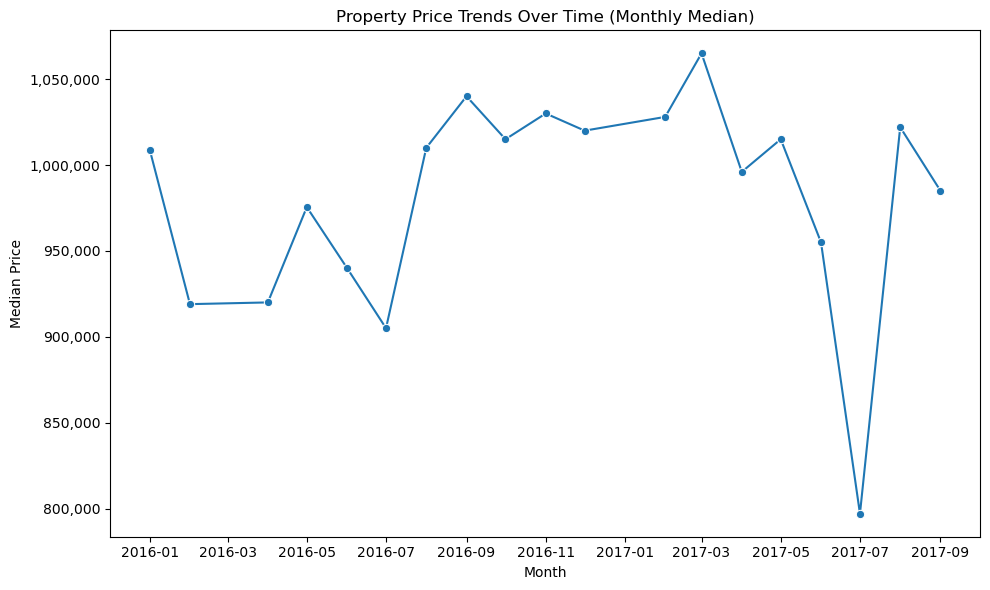

In [41]:
# Line Chart — Price Trends Over Time
line_df = df.copy()
line_df['YearMonth'] = line_df['Date'].dt.to_period('M')
med_price_by_month = line_df.groupby('YearMonth')['Price'].median().reset_index()
med_price_by_month['YearMonth'] = med_price_by_month['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=med_price_by_month, x='YearMonth', y='Price', marker='o')

plt.title('Property Price Trends Over Time (Monthly Median)')
plt.xlabel('Month')
plt.ylabel('Median Price')

# Format y-axis to show full numbers, not scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()



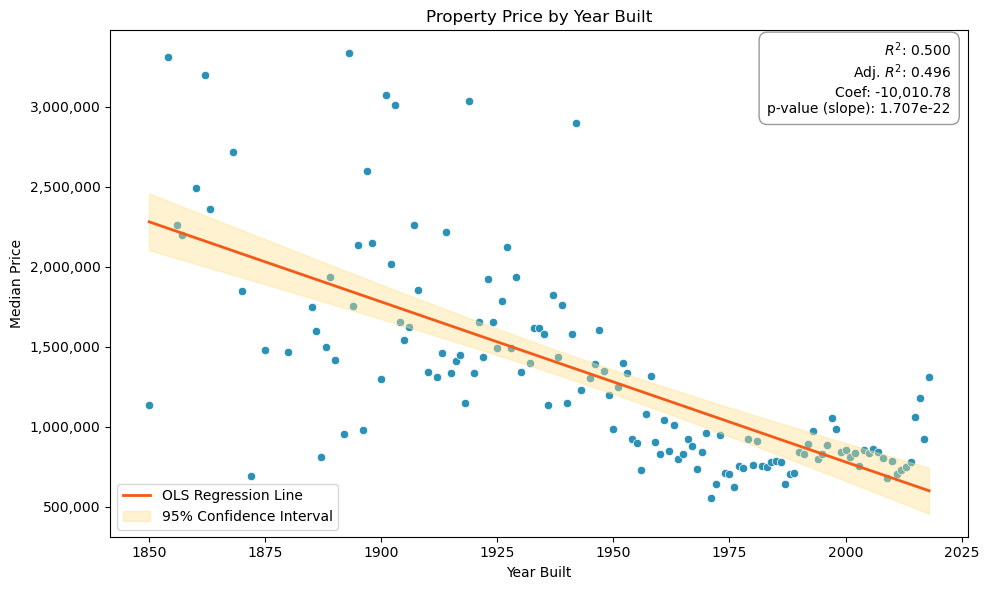

In [42]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

# Prepare data
med_price_by_yearbuilt = df.groupby('YearBuilt')['Price'].median().reset_index()

plt.figure(figsize=(10, 6))

ax = sns.scatterplot(data=med_price_by_yearbuilt, x='YearBuilt', y='Price', color='#2c91b6')

# Fit OLS regression
X = med_price_by_yearbuilt['YearBuilt']
Y = med_price_by_yearbuilt['Price']
X_const = add_constant(X)
model = OLS(Y, X_const).fit()

# Predictions and confidence interval
predictions = model.get_prediction(X_const)
pred_summary = predictions.summary_frame(alpha=0.05)

# Plot regression line
plt.plot(X, pred_summary['mean'], color='#f35a18', label='OLS Regression Line', linewidth=2)

# Plot confidence interval
plt.fill_between(X,
                 pred_summary['mean_ci_lower'],
                 pred_summary['mean_ci_upper'],
                 color='#fee08b',
                 alpha=0.4,
                 label='95% Confidence Interval')

plt.title('Property Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Median Price')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Create info card with model performance 
info_text = (f'$R^2$: {model.rsquared:.3f}\n'
             f'Adj. $R^2$: {model.rsquared_adj:.3f}\n'
             f'Coef: {model.params[1]:,.2f}\n'
             f'p-value (slope): {model.pvalues[1]:.3e}')

props = dict(boxstyle='round,pad=0.6', facecolor='white', alpha=0.8, edgecolor='gray')
ax.text(0.98, 0.98, info_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.legend()
plt.tight_layout()
plt.show()


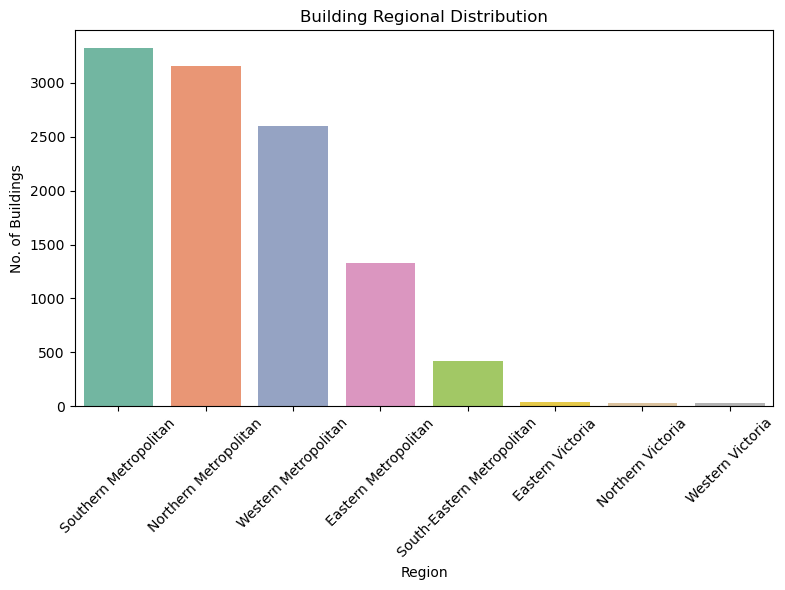

In [43]:
# Bar Chart — Building regional distrubution
plt.figure(figsize=(8, 6))

order = df['Regionname'].value_counts().index
palette = sns.color_palette('Set2', n_colors=len(order))

ax = sns.countplot(data=df, x='Regionname', order=order, palette=palette)

plt.title('Building Regional Distribution')
plt.xlabel('Region')
plt.ylabel('No. of Buildings')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

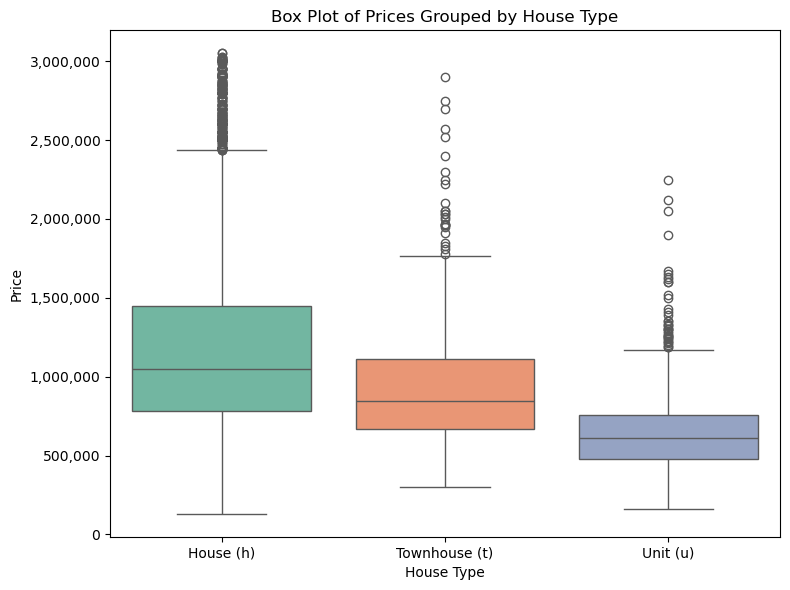

In [44]:
# Box Plot — Price distribution by house type
type_mapping = {'h': 'House (h)', 't': 'Townhouse (t)', 'u': 'Unit (u)'}
box_df = df.copy()
box_df['Type_full'] = box_df['Type'].map(type_mapping)

price_upper = np.percentile(box_df['Price'], 99)
box_df = box_df[(box_df['Price'] <= price_upper)]

plt.figure(figsize=(8, 6))

palette = sns.color_palette('Set2', n_colors=len(order))
ax = sns.boxplot(data=box_df, x='Type_full', y='Price', order=['House (h)', 'Townhouse (t)', 'Unit (u)'], palette=palette)

plt.title('Box Plot of Prices Grouped by House Type')
plt.xlabel('House Type')
plt.ylabel('Price')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()



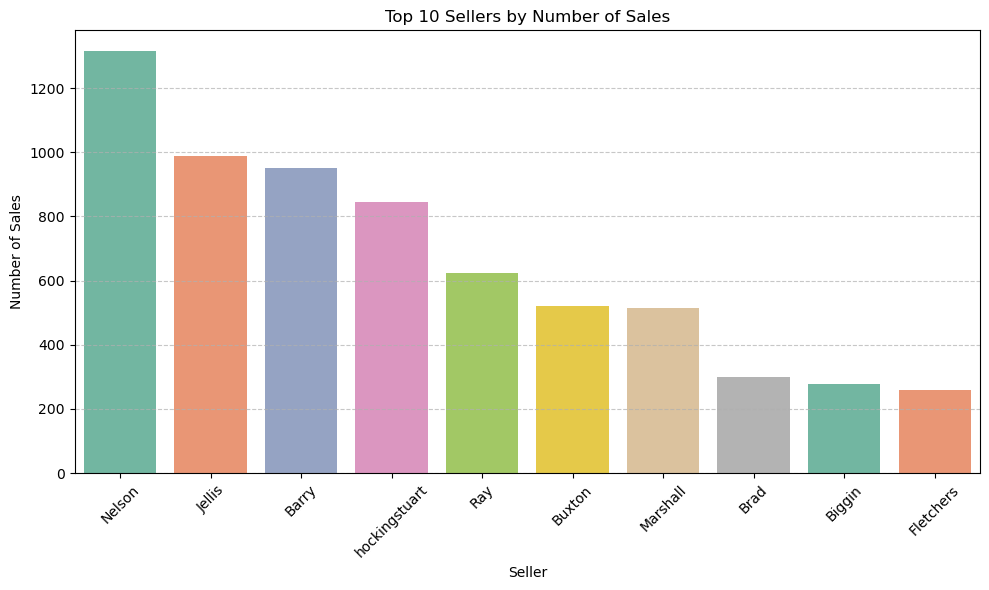

In [45]:
# Bar Chart — Top 10 Sellers
seller_counts = df['SellerG'].value_counts()
top_10_sellers = pd.concat([seller_counts.head(10)]).index

# Filter dataframe for those sellers only
df_filtered = df[df['SellerG'].isin(top_10_sellers)]

plt.figure(figsize=(10, 6))
order = df_filtered['SellerG'].value_counts().index
palette = sns.color_palette('Set2', n_colors=len(order))

ax = sns.countplot(data=df_filtered, x='SellerG', order=order, palette=palette)

plt.title('Top 10 Sellers by Number of Sales')
plt.xlabel('Seller')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


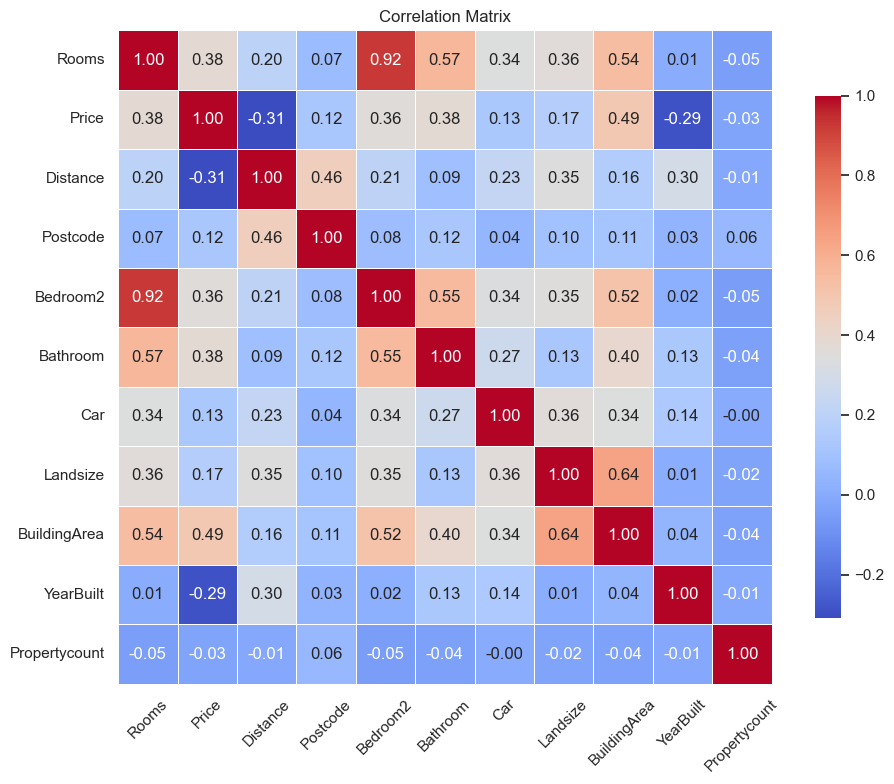

In [46]:
# Correlation Matrix
numeric_df = df.select_dtypes(include='number')
cols_to_exclude = ['Lattitude', 'Longtitude']
numeric_df = numeric_df.drop(columns=[col for col in cols_to_exclude if col in numeric_df.columns])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Set plot size and style
plt.figure(figsize=(10, 8))
sns.set(style='white')

# Plot heatmap of the correlation matrix
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title('Correlation Matrix')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



From above, we could see $Rooms$ and $Bedrooms2$ are highly correlated, potentially resulting in severe multicollinearity issue. Hence, we will consider dimensionality reduction methods like Elastic Net (Mixture of L1 and L2 Regularisation), or advanced techniques in the future.

# Machine Learning

Given the dataset’s timeframe of around 1 year and 9 months with weekly sales records, conducting time series forecasting is challenging due to the limited temporal data and potentially unobserved seasonal sales patterns. Therefore, our main focus is on <br><br>
**Predicting the price of indivudial property with tabular dataset**<br>

This model aims to provide practical value for various stakeholders:<br>
- **Buyers**: Help evaluate the real market value of properties, enabling informed decisions on whether a listing price is reasonable.<br>
- **Sellers**: Assist in understanding their property’s worth better and inform strategic pricing decisions, such as adjusting markups.<br>
- **Property developers**: Offer insights to maximize property value by optimizing development factors like building area, land size, and location choices.<br><br>



## Tabular Dataset

### Data preprocessing

Note that some features might not be relevant to our task. <br><br>
1. $Address$: The address itself does not provide any valuable information. Each property has an unique address. Hence, the model can never be trained to obtain any value solely from the address, but its surrending factors like Rooms, Suburb, etc.<br>

In [47]:
df = pd.read_csv('melb_data_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.drop(columns=['Address'])

In [48]:
# Date fearture extraction; Day is not kept since the dataset is very likely input weekly instead of daily
# Year is not kept since there are only 2 years of data (2016 and 2017)
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df = df.drop(columns=['Date'])
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,DayOfWeek
0,Abbotsford,2.0,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,...,202.0,95.882099,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,12,5
1,Abbotsford,2.0,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,...,156.0,79.000000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,2,3
2,Abbotsford,3.0,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,...,134.0,150.000000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,3,5
3,Abbotsford,3.0,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,...,94.0,39.272105,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,3,5
4,Abbotsford,4.0,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,...,120.0,142.000000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,6,5


In [49]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Price'])
y = np.log(df['Price'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [50]:
df.nunique()

Suburb            305
Rooms               9
Type                3
Price            1985
Method              5
SellerG           247
Distance          199
Postcode          192
Bedroom2           12
Bathroom            8
Car                11
Landsize         1090
BuildingArea     5690
YearBuilt         140
CouncilArea        34
Lattitude        5942
Longtitude       6481
Regionname          8
Propertycount     302
Month              12
DayOfWeek           5
dtype: int64

#### Encoding <br>
Note that in our dataset, some categorical features e.g. $Type$, $Method$, $Regionname$ only have a few types. Hence, one-hot encoding will be used.<br>

However, for $Suburb$, $SellerG$, and $CouncilArea$, there are too many types. To avoid high dimensionality from adding over 580 features and to prevent the implicit order which could be misinterpreted by non-tree models , frequency encoding will be applied to these features. <br>
Despite the major drawback of struggling with unseen categories , our dataset inherently rarely deals with unseen data such as new Suburb or CouncilArea. Hence, frequency encoding remains the most optimal solution so far. <br><br>

[1] https://www.geeksforgeeks.org/machine-learning/categorical-data-encoding-techniques-in-machine-learning/ <br>
[2] https://letsdatascience.com/frequency-encoding/

In [51]:
freq_encode_cols = ['Suburb', 'SellerG', 'CouncilArea']

def frequency_encoding(X_train, X_test, col):
    freq = X_train[col].value_counts() / len(X_train)
    X_train[col + '_freq_enc'] = X_train[col].map(freq)
    X_test[col + '_freq_enc'] = X_test[col].map(freq).fillna(0)  # Fill unseen with 0

for col in freq_encode_cols:
    frequency_encoding(X_train, X_test, col)

# Dropping original colums
X_train = X_train.drop(columns=freq_encode_cols)
X_test = X_test.drop(columns=freq_encode_cols)

Note that we will drop the first category per feature to avoid Dummy Variable Trap [1]. <br><br>
For instance assuming we have 2 classes for feature 'Type' -> 'h'(house) and 't'(townhouse). <br>
$X_{Type} = [h, t, t, h, t, h, h, t]$<br>
Note that after one-hot encoding, the above array becomes <br>
$X_{h} = [1, 0, 0, 1, 0, 1, 1, 0]; X_{t} = [0, 1, 1, 0, 1, 0, 0, 1]$ <br>
We could see knowing 1 in $h$ means 0 in $t$. Hence, $X_{h} = 1 - X_{t}$. Such redundant information introduces perfect multicollinearity among dummy variables (See [1] for detailed explanation). <br><br>
[1] https://www.learndatasci.com/glossary/dummy-variable-trap/#:~:text=machine%20learning%20courses.-,What%20is%20the%20Dummy%20Variable%20Trap?,is%20of%20the%20column's%20species.

In [52]:
from sklearn.preprocessing import OneHotEncoder

onehot_encode_cols = ['Type', 'Method', 'Regionname']

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train[onehot_encode_cols])

X_train_onehot = encoder.transform(X_train[onehot_encode_cols])
X_test_onehot = encoder.transform(X_test[onehot_encode_cols])

onehot_cols = encoder.get_feature_names_out(onehot_encode_cols)

# Convert arrays to DataFrames
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=onehot_cols, index=X_train.index)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=onehot_cols, index=X_test.index)

# Drop original columns and concatenate one-hot encoded columns
X_train = X_train.drop(columns=onehot_encode_cols).join(X_train_onehot_df)
X_test = X_test.drop(columns=onehot_encode_cols).join(X_test_onehot_df)

In [53]:
print(f'There are totoal of {len(list(X_train))} rows after encoding;\n {list(X_train)}')

There are totoal of 30 rows after encoding;
 ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount', 'Month', 'DayOfWeek', 'Suburb_freq_enc', 'SellerG_freq_enc', 'CouncilArea_freq_enc', 'Type_t', 'Type_u', 'Method_S', 'Method_SA', 'Method_SP', 'Method_VB', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Western Victoria']


#### Dimensionality Reduction

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

print(vif_data.sort_values(by='VIF', ascending=False))

                                  feature            VIF
10                             Longtitude  630573.481214
9                               Lattitude  610686.156953
8                               YearBuilt    6364.622394
2                                Postcode    2776.874676
0                                   Rooms      98.010518
3                                Bedroom2      85.615318
13                              DayOfWeek      20.605242
7                            BuildingArea      15.115880
1                                Distance      12.215906
16                   CouncilArea_freq_enc      11.619310
6                                Landsize      11.279561
4                                Bathroom      11.118452
11                          Propertycount       9.930049
14                        Suburb_freq_enc       9.167577
12                                  Month       9.066895
19                               Method_S       7.490624
27       Regionname_Southern Me

Above shows there is a severe multicollinearity issue. VIF > 10 usually indicates multicollinearity issue [1].<br>
Hence, we will consider Principal Component Analysis (PCA), SelectKBest and Recursive Feature Elimination (RFE) to resolve this issue.<br><br>
StandardScaler is being used with Mean = 0 and SD = 1.

[1] https://quantifyinghealth.com/vif-threshold/

Best number of components: 30
CV average RMSE: 0.2412


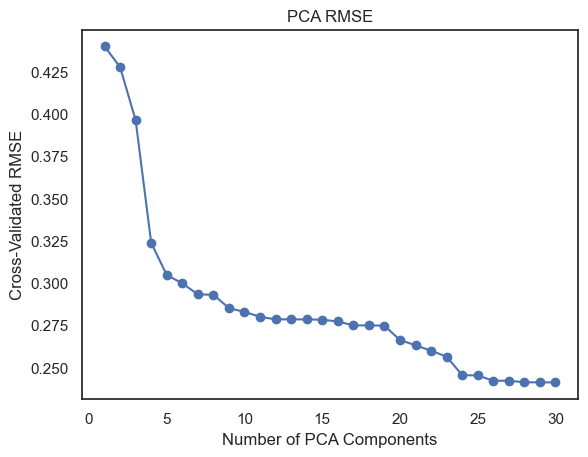

In [55]:
# Method 1: PCA - Hyperparameter Tuning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score


# Define range of PCA components to test
component_range = range(1, min(X_train.shape[1], 30) + 1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for n_components in component_range:
    rmses = []

    for train_index, val_index in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Scale
        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)

        # PCA
        pca = PCA(n_components=n_components)
        X_tr_pca = pca.fit_transform(X_tr_scaled)
        X_val_pca = pca.transform(X_val_scaled)

        # Model
        model = LinearRegression()
        model.fit(X_tr_pca, y_tr)
        y_val_pred = model.predict(X_val_pca)

        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        rmses.append(rmse)

    avg_rmse = np.mean(rmses)
    results.append({'n_components': n_components, 'avg_rmse': avg_rmse})

# Convert to DataFrame to inspect
results_df = pd.DataFrame(results)

best_n = results_df.loc[results_df['avg_rmse'].idxmin(), 'n_components']
best_rmse = results_df['avg_rmse'].min()

print(f'Best number of components: {best_n}')
print(f'CV average RMSE: {best_rmse:.4f}')

plt.plot(results_df['n_components'], results_df['avg_rmse'], marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cross-Validated RMSE')
plt.title('PCA RMSE')
plt.show()


In [56]:
# Method 1: PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=24)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print(f'R² score: {r2_score(y_test, y_pred):.4f}')
print(f'RMSE: {mean_squared_error(y_test, y_pred):.4f}')


R² score: 0.7383
RMSE: 0.0594


Best number of features: 30
CV average RMSE: 0.2412


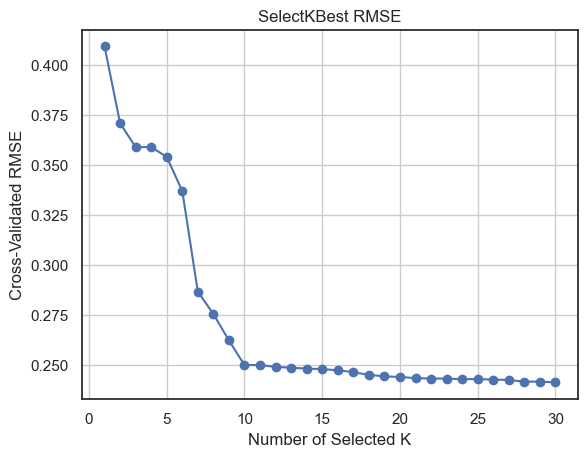

In [57]:
# Method 2: SelectKBest - Hyperparameter Tuning
from sklearn.feature_selection import SelectKBest, f_regression

k_range = range(1, min(X_train.shape[1], 30) + 1)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for k in k_range:
    rmses = []
    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)

        selector = SelectKBest(score_func=f_regression, k=k)
        X_tr_sel = selector.fit_transform(X_tr_scaled, y_tr)
        X_val_sel = selector.transform(X_val_scaled)

        model = LinearRegression()
        model.fit(X_tr_sel, y_tr)
        y_val_pred = model.predict(X_val_sel)
        
        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        rmses.append(rmse)

    avg_rmse = np.mean(rmses)
    results.append({'n_features': k, 'avg_rmse': avg_rmse})

results_df = pd.DataFrame(results)

best_k = results_df.loc[results_df['avg_rmse'].idxmin(), 'n_features']
best_rmse = results_df['avg_rmse'].min()

print(f'Best number of features: {best_k}')
print(f'CV average RMSE: {best_rmse:.4f}')

plt.plot(results_df['n_features'], results_df['avg_rmse'], marker='o')
plt.xlabel('Number of Selected K')
plt.ylabel('Cross-Validated RMSE')
plt.title('SelectKBest RMSE')
plt.grid(True)
plt.show()


In [58]:
selector = SelectKBest(score_func=f_regression, k=10)
X_train_sel = selector.fit_transform(X_train_scaled, y_train)
X_test_sel = selector.transform(X_test_scaled)

# Get feature names selected and excluded
selected_mask = selector.get_support()  # boolean mask of selected features
selected_features = X_train.columns[selected_mask]
excluded_features = X_train.columns[~selected_mask]

print("Selected features:")
print(selected_features.to_list())
print("\nExcluded features:")
print(excluded_features.to_list())

# Train linear regression on selected features
model = LinearRegression()
model.fit(X_train_sel, y_train)
y_pred = model.predict(X_test_sel)

# Evaluate model
print(f"\nR² score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred):.4f}")

Selected features:
['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Type_u', 'Regionname_Southern Metropolitan']

Excluded features:
['Postcode', 'Car', 'Landsize', 'Propertycount', 'Month', 'DayOfWeek', 'Suburb_freq_enc', 'SellerG_freq_enc', 'CouncilArea_freq_enc', 'Type_t', 'Method_S', 'Method_SA', 'Method_SP', 'Method_VB', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Western Victoria']

R² score: 0.7302
RMSE: 0.0612


Best number of features: 30
CV average RMSE: 0.2412


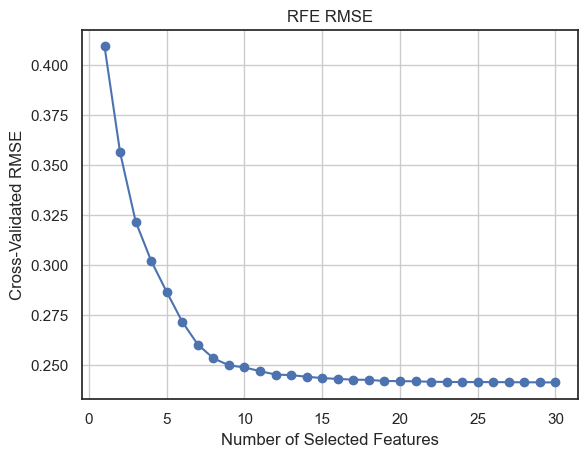

In [59]:
# Method 3: Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

feature_range = range(1, min(X_train.shape[1], 30) + 1)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for k in feature_range:
    rmses = []
    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)

        model = LinearRegression()
        selector = RFE(estimator=model, n_features_to_select=k, step=1)
        X_tr_sel = selector.fit_transform(X_tr_scaled, y_tr)
        X_val_sel = selector.transform(X_val_scaled)

        model.fit(X_tr_sel, y_tr)
        y_val_pred = model.predict(X_val_sel)

        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        rmses.append(rmse)

    avg_rmse = np.mean(rmses)
    results.append({'n_features': k, 'avg_rmse': avg_rmse})

results_df = pd.DataFrame(results)

best_k = results_df.loc[results_df['avg_rmse'].idxmin(), 'n_features']
best_rmse = results_df['avg_rmse'].min()

print(f'Best number of features: {best_k}')
print(f'CV average RMSE: {best_rmse:.4f}')

plt.plot(results_df['n_features'], results_df['avg_rmse'], marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('Cross-Validated RMSE')
plt.title('RFE RMSE')
plt.grid(True)
plt.show()

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
selector = RFE(estimator=model, n_features_to_select=10, step=1)
X_train_sel = selector.fit_transform(X_train_scaled, y_train)
X_test_sel = selector.transform(X_test_scaled)

model.fit(X_train_sel, y_train)
y_pred = model.predict(X_test_sel)

print(f'R² score: {r2_score(y_test, y_pred):.4f}')
print(f'RMSE: {mean_squared_error(y_test, y_pred):.4f}')

selected_mask = selector.get_support()
selected_features = X_train.columns[selected_mask]
excluded_features = X_train.columns[~selected_mask]

print("Selected features:", selected_features.to_list())
print("Excluded features:", excluded_features.to_list())


R² score: 0.7305
RMSE: 0.0612
Selected features: ['Rooms', 'Distance', 'Postcode', 'Bathroom', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Type_u', 'Regionname_Southern Metropolitan']
Excluded features: ['Bedroom2', 'Car', 'Landsize', 'Propertycount', 'Month', 'DayOfWeek', 'Suburb_freq_enc', 'SellerG_freq_enc', 'CouncilArea_freq_enc', 'Type_t', 'Method_S', 'Method_SA', 'Method_SP', 'Method_VB', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Western Victoria']


From above, we could see PCA's RMSE (0.0594) is slightly lower than SelectKBest's RMSE (0.0612) and RFE's RMSE(0.0612). Additionally, PCA's r2 score (0.7383) is higher than SelectKBest's r2 score (0.7302) and RFE's r2 score (0.7305). <br>
Hence, **PCA** will be selected according to our baseline model comparision.

In [61]:
# Scale and PCA transform (n_components=24)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=24)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### OLS (Orginary Least Squared) with EN (Elastic Net) Regularisation

In [62]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import time

en = ElasticNet(random_state=42, max_iter=10000)
param_grid_en = {
    'alpha': [0.01, 0.1, 1.0, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_en = GridSearchCV(
    estimator=en,
    param_grid=param_grid_en,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search_en.fit(X_train_pca, y_train)
training_time_en = time.time() - start_time

print("Best Elastic Net hyperparameters:", grid_search_en.best_params_)
best_en = grid_search_en.best_estimator_
y_train_pred_en = best_en.predict(X_train_pca)
y_test_pred_en = best_en.predict(X_test_pca)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Elastic Net hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.1}


In [63]:
def compute_metrics(y_true, y_pred):
    return {
        'R2': r2_score(y_true, y_pred),
        'RMSE': mean_squared_error(y_true, y_pred) ** 0.5,
        'MAE': mean_absolute_error(y_true, y_pred)
    }

train_metrics_en = compute_metrics(y_train, y_train_pred_en)
test_metrics_en = compute_metrics(y_test, y_test_pred_en)

models_results = pd.DataFrame(columns=[
    'Model', 'Train_R2', 'Test_R2', 'Train_RMSE', 'Test_RMSE',
    'Train_MAE', 'Test_MAE', 'Training_Time_Seconds'
])

new_row_en = pd.DataFrame([{
    'Model': 'OLS with EN (PCA)',
    'Train_R2': train_metrics_en['R2'],
    'Test_R2': test_metrics_en['R2'],
    'Train_RMSE': train_metrics_en['RMSE'],
    'Test_RMSE': test_metrics_en['RMSE'],
    'Train_MAE': train_metrics_en['MAE'],
    'Test_MAE': test_metrics_en['MAE'],
    'Training_Time_Seconds': training_time_en
}])

models_results = pd.concat([models_results, new_row_en], ignore_index=True)
models_results


,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Training_Time_Seconds
0,OLS with EN (PCA),0.729255,0.738161,0.244708,0.243765,0.187105,0.185207,2.715519


### Support Vector Regression (SVR)

In [64]:
from sklearn.svm import SVR

svr = SVR()
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 0.2]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_svr = GridSearchCV(
    estimator=svr,
    param_grid=param_grid_svr,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search_svr.fit(X_train_pca, y_train)
training_time_svr = time.time() - start_time

print("Best SVR hyperparameters:", grid_search_svr.best_params_)
best_svr = grid_search_svr.best_estimator_
y_train_pred_svr = best_svr.predict(X_train_pca)
y_test_pred_svr = best_svr.predict(X_test_pca)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best SVR hyperparameters: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


In [65]:
train_metrics_svr = compute_metrics(y_train, y_train_pred_svr)
test_metrics_svr = compute_metrics(y_test, y_test_pred_svr)

# Step 5: Store results in models_results DataFrame; append if it exists
new_row_svr = pd.DataFrame([{
    'Model': 'SVR (PCA)',
    'Train_R2': train_metrics_svr['R2'],
    'Test_R2': test_metrics_svr['R2'],
    'Train_RMSE': train_metrics_svr['RMSE'],
    'Test_RMSE': test_metrics_svr['RMSE'],
    'Train_MAE': train_metrics_svr['MAE'],
    'Test_MAE': test_metrics_svr['MAE'],
    'Training_Time_Seconds': training_time_svr
}])

models_results = pd.concat([models_results, new_row_svr], ignore_index=True)
models_results

,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Training_Time_Seconds
0,OLS with EN (PCA),0.729255,0.738161,0.244708,0.243765,0.187105,0.185207,2.715519
1,SVR (PCA),0.887885,0.838094,0.157470,0.191684,0.117891,0.142452,291.268814


### Decision Tree Regression

In [66]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search.fit(X_train_pca, y_train)
training_time = time.time() - start_time

print("Best hyperparameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_
y_train_pred = best_dt.predict(X_train_pca)
y_test_pred = best_dt.predict(X_test_pca)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [67]:
def compute_metrics(y_true, y_pred):
    return {
        'R2': r2_score(y_true, y_pred),
        'RMSE': mean_squared_error(y_true, y_pred) ** 0.5,
        'MAE': mean_absolute_error(y_true, y_pred)
    }

train_metrics = compute_metrics(y_train, y_train_pred)
test_metrics = compute_metrics(y_test, y_test_pred)

new_row = pd.DataFrame([{
    'Model': 'Decision Tree (PCA)',
    'Train_R2': train_metrics['R2'],
    'Test_R2': test_metrics['R2'],
    'Train_RMSE': train_metrics['RMSE'],
    'Test_RMSE': test_metrics['RMSE'],
    'Train_MAE': train_metrics['MAE'],
    'Test_MAE': test_metrics['MAE'],
    'Training_Time_Seconds': training_time
}])

models_results = pd.concat([models_results, new_row], ignore_index=True)
models_results

,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Training_Time_Seconds
0,OLS with EN (PCA),0.729255,0.738161,0.244708,0.243765,0.187105,0.185207,2.715519
1,SVR (PCA),0.887885,0.838094,0.157470,0.191684,0.117891,0.142452,291.268814
2,Decision Tree (PCA),0.821082,0.636025,0.198927,0.287402,0.150015,0.213704,5.135714


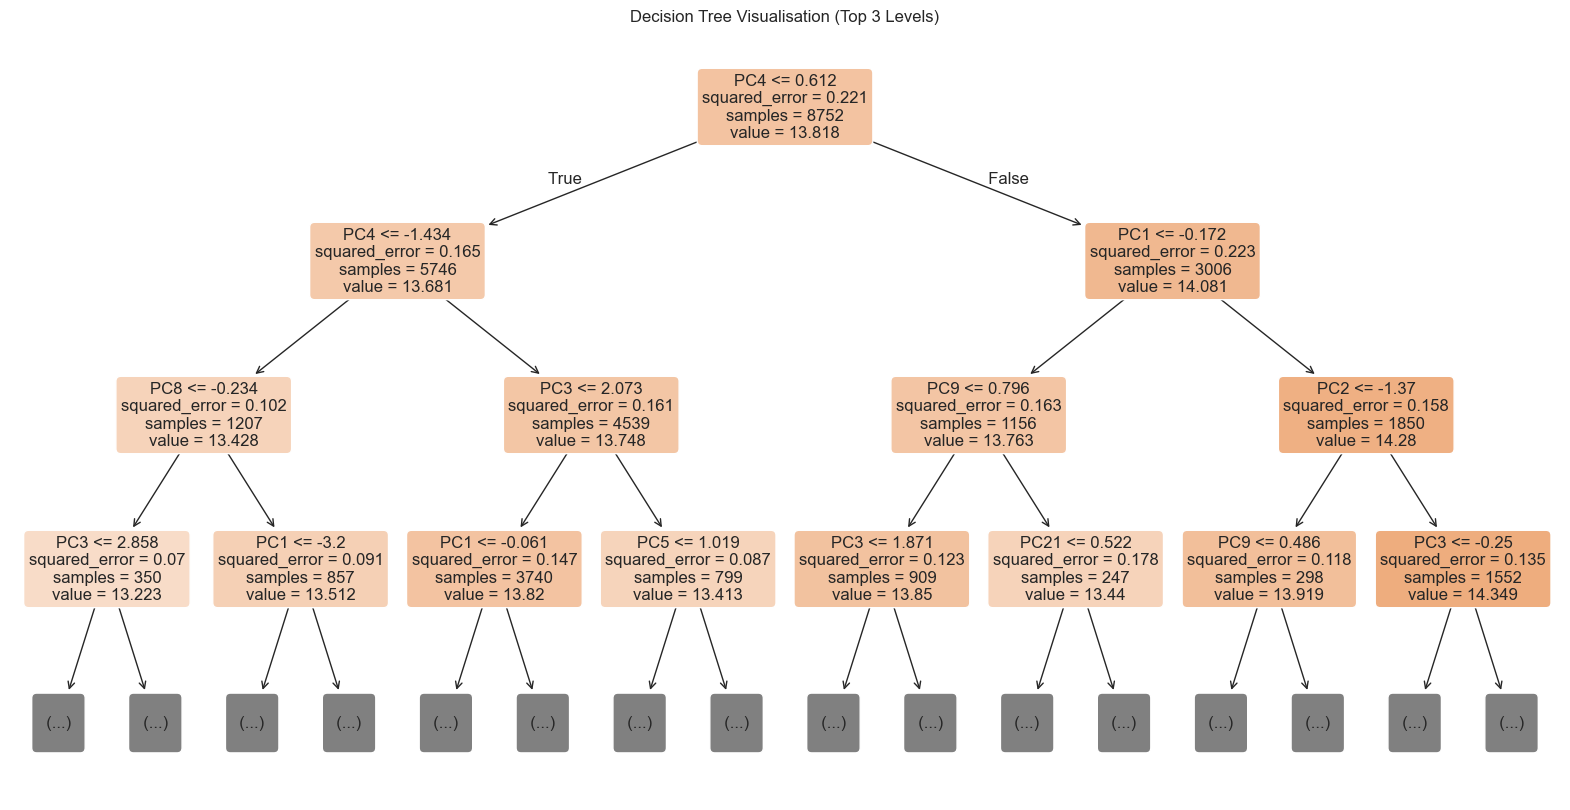

In [68]:
# Visualisation of decision tree (top 3 levels)
plt.figure(figsize=(20,10))
plot_tree(
    best_dt,
    filled=True,
    rounded=True,
    feature_names=[f'PC{i+1}' for i in range(X_train_pca.shape[1])],
    max_depth=3,
    fontsize=12
)
plt.title("Decision Tree Visualisation (Top 3 Levels)")
plt.show()

### Boosting algorithms

#### XGBoost (eXtreme Gradient Boosting)
Building an ensemble of decision trees sequentially and each new tree corrects the errors of the previous ensemble (Weak learners) [1]. <br>
[1] https://www.geeksforgeeks.org/machine-learning/xgboost/

In [69]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_xgb = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid_xgb,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search_xgb.fit(X_train_pca, y_train)
training_time_xgb = time.time() - start_time

print("Best XGBoost hyperparameters:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_train_pred_xgb = best_xgb.predict(X_train_pca)
y_test_pred_xgb = best_xgb.predict(X_test_pca)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best XGBoost hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [70]:
train_metrics_xgb = compute_metrics(y_train, y_train_pred_xgb)
test_metrics_xgb = compute_metrics(y_test, y_test_pred_xgb)

new_row_xgb = pd.DataFrame([{
    'Model': 'XGBoost (PCA)',
    'Train_R2': train_metrics_xgb['R2'],
    'Test_R2': test_metrics_xgb['R2'],
    'Train_RMSE': train_metrics_xgb['RMSE'],
    'Test_RMSE': test_metrics_xgb['RMSE'],
    'Train_MAE': train_metrics_xgb['MAE'],
    'Test_MAE': test_metrics_xgb['MAE'],
    'Training_Time_Seconds': training_time_xgb
}])

models_results = pd.concat([models_results, new_row_xgb], ignore_index=True)
models_results

,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Training_Time_Seconds
0,OLS with EN (PCA),0.729255,0.738161,0.244708,0.243765,0.187105,0.185207,2.715519
1,SVR (PCA),0.887885,0.838094,0.157470,0.191684,0.117891,0.142452,291.268814
2,Decision Tree (PCA),0.821082,0.636025,0.198927,0.287402,0.150015,0.213704,5.135714
3,XGBoost (PCA),0.980819,0.818974,0.065134,0.202686,0.049530,0.151118,38.773822


#### AdaBoost (Adaptive Boosting)
Focuses on misclassified samples by increasing their wright to force next weak learner to pay attention to them [1]. <br>
[1] https://www.geeksforgeeks.org/machine-learning/AdaBoost-in-Machine-Learning/

In [71]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42)
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [2, 3, 4]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search_ada.fit(X_train_pca, y_train)
training_time_ada = time.time() - start_time

print("Best AdaBoost hyperparameters:", grid_search_ada.best_params_)

best_ada = grid_search_ada.best_estimator_
y_train_pred_ada = best_ada.predict(X_train_pca)
y_test_pred_ada = best_ada.predict(X_test_pca)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best AdaBoost hyperparameters: {'estimator__max_depth': 4, 'learning_rate': 1.0, 'n_estimators': 200}


In [72]:
train_metrics_ada = compute_metrics(y_train, y_train_pred_ada)
test_metrics_ada = compute_metrics(y_test, y_test_pred_ada)

new_row_ada = pd.DataFrame([{
    'Model': 'AdaBoost (PCA)',
    'Train_R2': train_metrics_ada['R2'],
    'Test_R2': test_metrics_ada['R2'],
    'Train_RMSE': train_metrics_ada['RMSE'],
    'Test_RMSE': test_metrics_ada['RMSE'],
    'Train_MAE': train_metrics_ada['MAE'],
    'Test_MAE': test_metrics_ada['MAE'],
    'Training_Time_Seconds': training_time_ada
}])

models_results = pd.concat([models_results, new_row_ada], ignore_index=True)
models_results

,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Training_Time_Seconds
0,OLS with EN (PCA),0.729255,0.738161,0.244708,0.243765,0.187105,0.185207,2.715519
1,SVR (PCA),0.887885,0.838094,0.157470,0.191684,0.117891,0.142452,291.268814
2,Decision Tree (PCA),0.821082,0.636025,0.198927,0.287402,0.150015,0.213704,5.135714
3,XGBoost (PCA),0.980819,0.818974,0.065134,0.202686,0.049530,0.151118,38.773822
4,AdaBoost (PCA),0.734912,0.696692,0.242137,0.262359,0.197012,0.206178,80.826766


### Random Forest Regression

In [73]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search_rf.fit(X_train_pca, y_train)
training_time_rf = time.time() - start_time

print("Best Random Forest hyperparameters:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_
y_train_pred_rf = best_rf.predict(X_train_pca)
y_test_pred_rf = best_rf.predict(X_test_pca)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x102f4e020>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105052020>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107206020>
Traceback (most recent call last

Best Random Forest hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [74]:
train_metrics_rf = compute_metrics(y_train, y_train_pred_rf)
test_metrics_rf = compute_metrics(y_test, y_test_pred_rf)

new_row_rf = pd.DataFrame([{
    'Model': 'Random Forest (PCA)',
    'Train_R2': train_metrics_rf['R2'],
    'Test_R2': test_metrics_rf['R2'],
    'Train_RMSE': train_metrics_rf['RMSE'],
    'Test_RMSE': test_metrics_rf['RMSE'],
    'Train_MAE': train_metrics_rf['MAE'],
    'Test_MAE': test_metrics_rf['MAE'],
    'Training_Time_Seconds': training_time_rf
}])

models_results = pd.concat([models_results, new_row_rf], ignore_index=True)
models_results

,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Training_Time_Seconds
0,OLS with EN (PCA),0.729255,0.738161,0.244708,0.243765,0.187105,0.185207,2.715519
1,SVR (PCA),0.887885,0.838094,0.157470,0.191684,0.117891,0.142452,291.268814
2,Decision Tree (PCA),0.821082,0.636025,0.198927,0.287402,0.150015,0.213704,5.135714
3,XGBoost (PCA),0.980819,0.818974,0.065134,0.202686,0.049530,0.151118,38.773822
4,AdaBoost (PCA),0.734912,0.696692,0.242137,0.262359,0.197012,0.206178,80.826766
5,Random Forest (PCA),0.969772,0.789010,0.081765,0.218819,0.061254,0.163869,92.985149


## Clustering Datset

### Data Preprocessing

In [75]:
df = pd.read_csv('melb_data_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.drop(columns=['Address'])

df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df = df.drop(columns=['Date'])

df['Price_log'] = np.log(df['Price'])
df = df.drop(columns=['Price'])

In [76]:
# Frequency encoding for categorical columns
freq_encode_cols = ['Suburb', 'SellerG', 'CouncilArea']

for col in freq_encode_cols:
    freq = df[col].value_counts() / len(df)
    df[col + '_freq_enc'] = df[col].map(freq)

df = df.drop(columns=freq_encode_cols)

# One-hot encode other categorical columns
onehot_encode_cols = ['Type', 'Method', 'Regionname']

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
onehot_encoded = encoder.fit_transform(df[onehot_encode_cols])

onehot_cols = encoder.get_feature_names_out(onehot_encode_cols)

df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_cols, index=df.index)

# Drop original categorical cols and concatenate one-hot encoded
df = df.drop(columns=onehot_encode_cols).join(df_onehot)

# Scale numeric features for clustering
numeric_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,-1.279272,-1.434783,-0.391392,-1.219144,-0.833773,-0.681435,-1.133104,-0.828151,0.183023,0.074579,...,-0.083084,-0.367706,-0.285778,-0.062818,1.569084,-0.055005,-0.19981,-0.660215,-0.558205,-0.053308
1,-1.279272,-1.434783,-0.391392,-1.219144,-0.833773,-1.694192,-1.322687,-1.089188,-2.252622,-0.025677,...,-0.083084,-0.367706,-0.285778,-0.062818,1.569084,-0.055005,-0.19981,-0.660215,-0.558205,-0.053308
2,-0.112322,-1.434783,-0.391392,-0.077924,0.659837,-1.694192,-1.413357,0.008638,-2.252622,-0.042588,...,-0.083084,2.719560,-0.285778,-0.062818,1.569084,-0.055005,-0.19981,-0.660215,-0.558205,-0.053308
3,-0.112322,-1.434783,-0.391392,-0.077924,0.659837,-0.681435,-1.578212,-1.703474,0.183023,0.107193,...,-0.083084,-0.367706,-0.285778,-0.062818,1.569084,-0.055005,-0.19981,-0.660215,-0.558205,-0.053308
4,1.054629,-1.434783,-0.391392,-0.077924,-0.833773,0.331321,-1.471056,-0.115060,1.714000,-0.017222,...,-0.083084,-0.367706,3.499222,-0.062818,1.569084,-0.055005,-0.19981,-0.660215,-0.558205,-0.053308


### K-Mean++

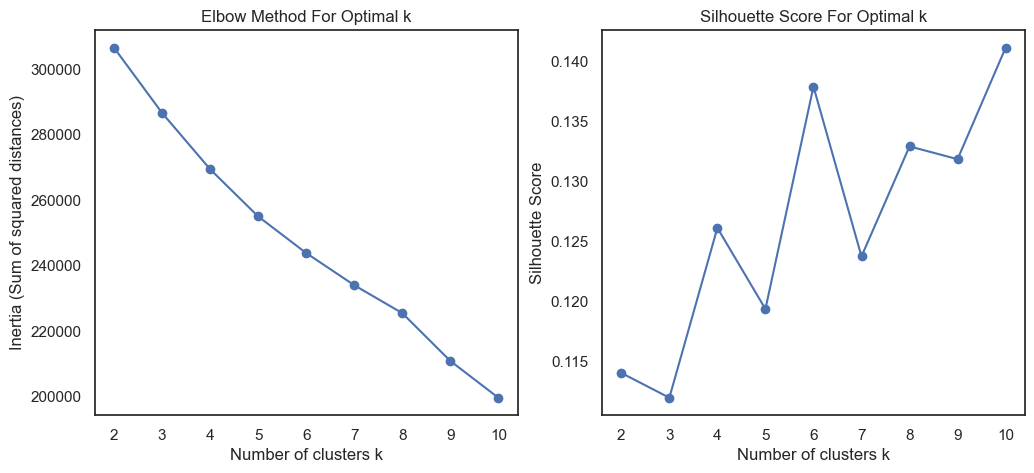

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(df, kmeans.labels_)
    silhouette.append(sil_score)

# Plot elbow and silhouette score
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method For Optimal k')

plt.subplot(1,2,2)
plt.plot(K_range, silhouette, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.show()

In [78]:
k = 6
start_time = time.time()
kmeans_final = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_final.fit(df)
fit_time = time.time() - start_time

df['Cluster'] = kmeans_final.labels_

clustering_results = pd.DataFrame(columns=[
    'Model', 'Num_Clusters', 'Inertia', 'Silhouette_Score', 'Training_Time_Seconds'
])

clustering_results = pd.concat([clustering_results, pd.DataFrame([{
    'Model': 'KMeans',
    'Num_Clusters': k,
    'Inertia': kmeans_final.inertia_,
    'Silhouette_Score': silhouette_score(df.drop(columns=['Cluster']), df['Cluster']),
    'Training_Time_Seconds': fit_time
}])], ignore_index=True)

clustering_results

,Model,Num_Clusters,Inertia,Silhouette_Score,Training_Time_Seconds
0,KMeans,6,243815.238558,0.137914,0.211895


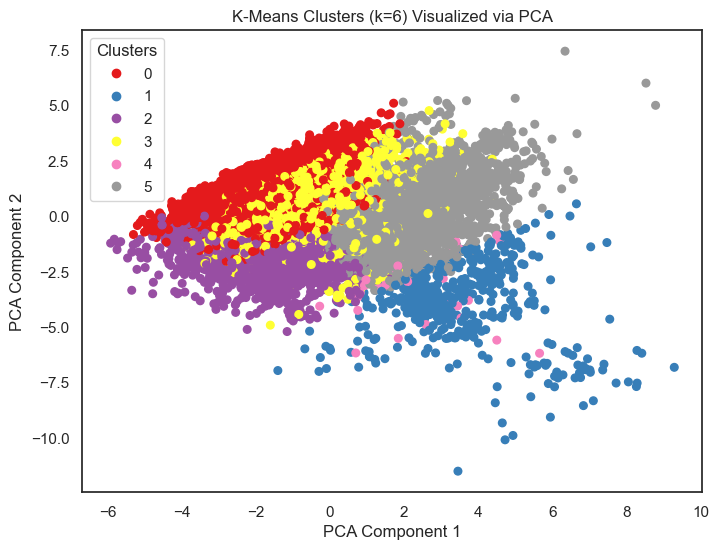

Cluster Characteristics Summary:


,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.192773,-0.358450,-0.407269,-0.187198,-0.314234,-0.171531,-0.276674,-0.314821,-0.125758,0.793668,...,-0.036666,0.002078,-0.074914,-0.062818,1.530672,-0.055005,-0.199810,-0.660215,-0.558205,-0.053308
1,0.321189,2.379864,1.630610,0.341098,0.127557,0.377256,0.510249,0.234994,0.324908,-2.211213,...,-0.004558,0.139059,-0.154979,1.421467,-0.637314,-0.055005,4.521398,-0.660215,-0.558205,-0.053308
2,-1.144247,-0.287254,0.328712,-1.105538,-0.616538,-0.588474,-0.567415,-0.853928,0.130392,-0.303486,...,-0.028246,-0.024455,0.044523,-0.062818,-0.360623,-0.055005,-0.199810,0.702068,-0.388094,-0.053308
3,0.067920,-0.026677,-0.715832,0.053599,-0.048814,0.088661,-0.032229,-0.075314,0.090600,0.300390,...,-0.011089,0.192281,-0.101400,-0.062818,-0.635567,-0.055005,-0.199810,-0.660215,1.741205,0.177657
4,0.418110,3.422471,3.329879,0.440812,0.343011,-0.006264,0.802819,0.029941,0.579475,2.167441,...,0.284163,0.567829,-0.285778,-0.062818,-0.637314,18.180076,-0.199810,-0.660215,-0.558205,-0.053308
5,0.568510,0.093255,0.458222,0.554311,0.545469,0.287049,0.426011,0.658734,-0.068246,-0.461754,...,0.048496,-0.153362,0.138142,-0.062818,-0.547798,-0.055005,-0.199810,0.801300,-0.547464,-0.053308


Exception ignored in: <function ResourceTracker.__del__ at 0x11007a020>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10477a020>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103bee020>
Traceback (most recent call last

In [ ]:
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(df.drop(columns=['Cluster']))

plt.figure(figsize=(8,6))
scatter = plt.scatter(components[:,0], components[:,1], c=df['Cluster'], cmap='Set1', s=30)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clusters (k={k}) Visualized via PCA')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

cluster_summary = df.groupby('Cluster').mean()
print("Cluster Characteristics Summary:")
cluster_summary
